In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Ángel Jaramillo Valencia
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [2]:
def seno_taylor(angulo, n):

  seno = 0

  for i in range(n):
    seno += (-1) ** i * angulo ** (2*i + 1)/ math.factorial(2 * i + 1)
  return seno

In [3]:
x = np.deg2rad(90)

seno_taylor(x, 10)

1.0

In [4]:
def taylor_seno32(angulo, tol):

  max_iter = 100
  seno = 0
  real_seno = math.sin(angulo)

  i = 0

  errors = np.zeros(max_iter)
  iteraciones  =np.arange(max_iter)

  while abs(real_seno - seno) > tol:
    seno += (-1) ** i * angulo ** (2*i + 1)/ math.factorial(2 * i + 1)
    error = abs(real_seno - seno)
    errors[i] = error
    i += 1
    if i > max_iter:
      break
  return errors[:i], iteraciones[: i], seno

In [5]:
x = np.deg2rad(80)
tol = np.finfo(np.float32).eps

er, N, seno = taylor_seno32(x, tol)

print(er, N, seno)

[4.11455649e-01 4.22255831e-02 1.99816285e-03 5.46102369e-05
 9.72913452e-07 1.21975796e-08] [0 1 2 3 4 5] 0.9848077408146284


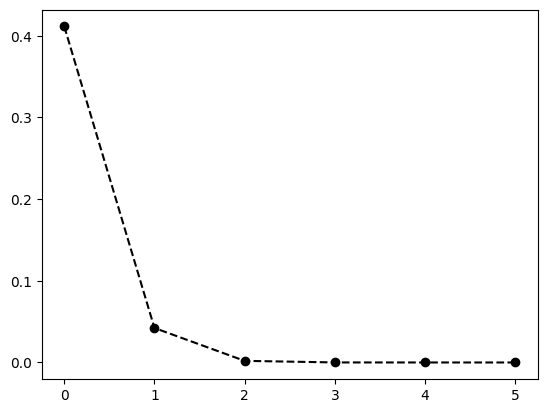

In [6]:
plt.plot(N, er, 'ko--')
plt.show()

In [7]:
def taylor_seno64(angulo, tol):

  max_iter = 100
  seno = 0
  real_seno = math.sin(angulo)

  i = 0

  errors = np.zeros(max_iter)
  iteraciones = np.arange(max_iter)

  while abs(real_seno - seno) > tol:
    seno += (-1) ** i * angulo ** (2*i + 1)/ math.factorial(2 * i + 1)
    error = abs((real_seno - seno)/abs(real_seno) * 100)
    errors[i] = error
    i += 1
    if i > max_iter:
      break
  return errors[: i], iteraciones[: i], seno

In [8]:
x = np.deg2rad(80)
tol_ = np.finfo(np.float64).eps

er, N, seno = taylor_seno64(x, tol_)

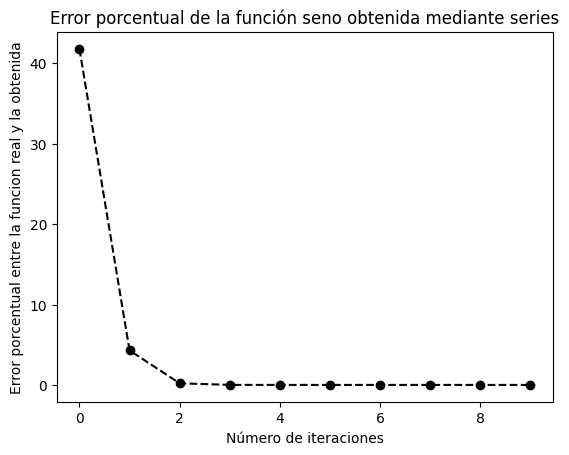

In [9]:
plt.plot(N, er, 'ko--')

plt.title('Error porcentual de la función seno obtenida mediante series')
plt.xlabel('Número de iteraciones')
plt.ylabel('Error porcentual entre la funcion real y la obtenida')
plt.show()

Las diferencias entre los errores de float32 y float64 varían porque el epsilon de float64 es mayor que el de 32, por lo que el computador debe realizar un mayor número de cálculos para llegar a dicha cifra.

#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [10]:
def euler_taylor_general(x, n):
    x = -x
    e = 0

    for i in range(n):
        e += ((-1) ** i * x ** i) / math.factorial(i)
    return e

In [11]:
def euler_taylor(x, n):

  if x <= 1:

    x = -x
    e = 0

    for i in range(n):
     e += ((-1) ** i * x ** i) / math.factorial(i)

    return(e, np.exp(-x))

  else: None

In [12]:
euler_taylor(1, 100)

(2.7182818284590455, 2.718281828459045)

In [13]:
def euler(x, n):

   N = 0
   suma = 1

   while abs(suma) > 10e-7 * abs(suma):

       N += 1

       suma = (-x) ** (N+1) / math.factorial(N + 1)

   return N

In [14]:
euler(0.1,100)

121

In [15]:
def euler_taylor1(x, n):

    x = -x
    e = 0
    terminos = []
    for i in range(n):

     termino = ((-1) ** i * x ** i) / math.factorial(i)
     terminos.append(termino)
     e += termino

    print(e, np.exp(-x))
    plt.figure(figsize=(10, 6))
    plt.plot(range(n), terminos, marker='o', label='Términos de la serie')
    plt.axhline( color='black')
    plt.title("Términos de la serie de Taylor de e^-x")
    plt.xlabel("n")
    plt.ylabel("e^-x ")
    plt.xticks(range(n), rotation = 90)
    plt.grid()
    plt.legend()
    plt.show()

22026.46579480671 22026.465794806718


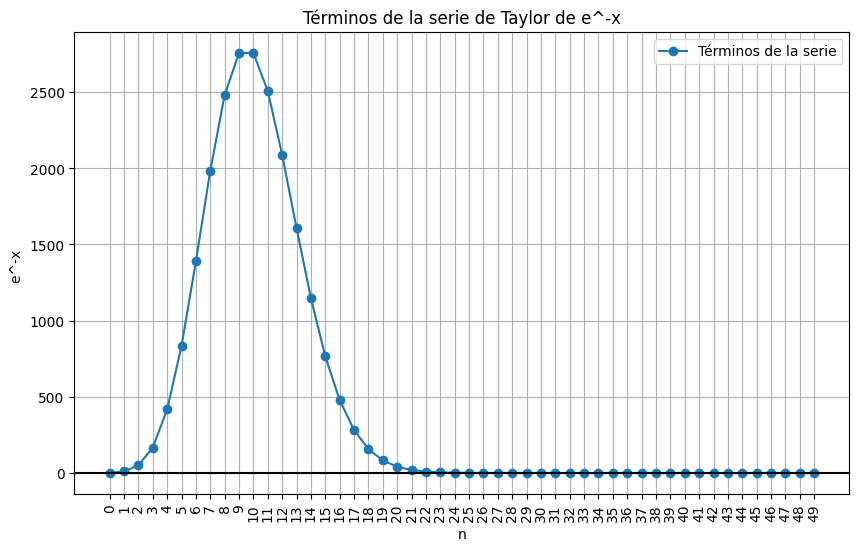

In [16]:
euler_taylor1(10, 50)

Nótese, con el valor de x en 10, la cancelación casi perfecta en n = 9 (x-1)

In [17]:
def euler_taylor2(x, n):

    x = -x
    e = 0
    terminos = []
    for i in range(n):

     termino = 1/((-1) ** i * x ** i) / math.factorial(i)

     terminos.append(termino)

     e += termino

    print(e, np.exp(-x))
    plt.figure(figsize=(10, 6))
    plt.plot(range(n), terminos, marker='o', label='Términos de la serie')
    plt.axhline(color='k')
    plt.title("Términos de la serie de Taylor de e^-x")
    plt.xlabel("n")
    plt.ylabel("e^-x ")
    plt.xticks(range(n), rotation = 90)
    plt.grid()
    plt.legend()
    plt.show()

1.1051709180756473 22026.465794806718


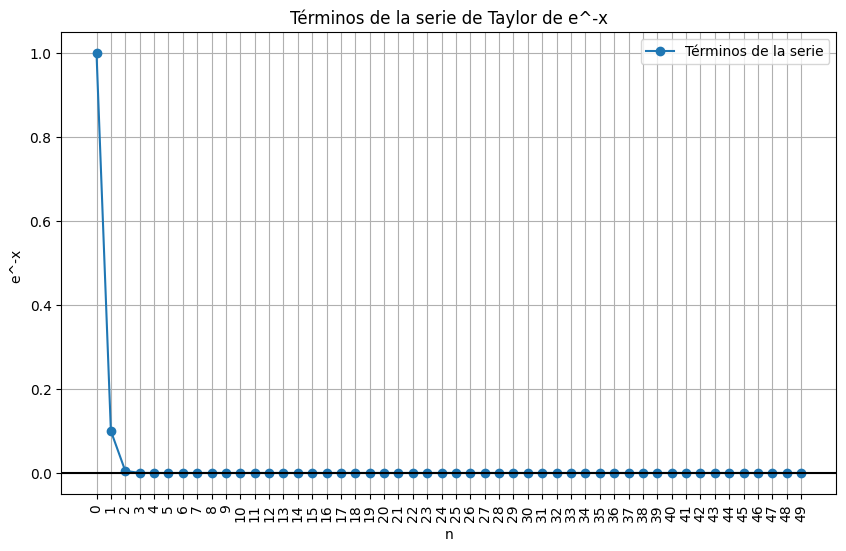

In [18]:
euler_taylor2(10, 50)

In [19]:
def euler_taylor3(x, n):

    x0 = [i for i in range(1, 11)]
    x1 = [i for i in range(10, 101, 10)]
    x2 = x0 + x1
    resultados = []

    for x in x2:
      resultado = euler_taylor_general(x, n)
      e_real = np.exp(-x)
      precision = abs((e_real - resultado) / e_real)
      resultados.append((x, precision))

    plt.figure(figsize=(10, 6))
    plt.plot(x2, resultados, marker ='o', label='Valores de x')
    plt.axhline(y=1e-10, color='k', linestyle='--')
    plt.title("Precisión de la serie de Taylor para e^-x")
    plt.xlabel("x")
    plt.ylabel("Resultados")
    plt.grid()
    plt.legend()
    plt.show()


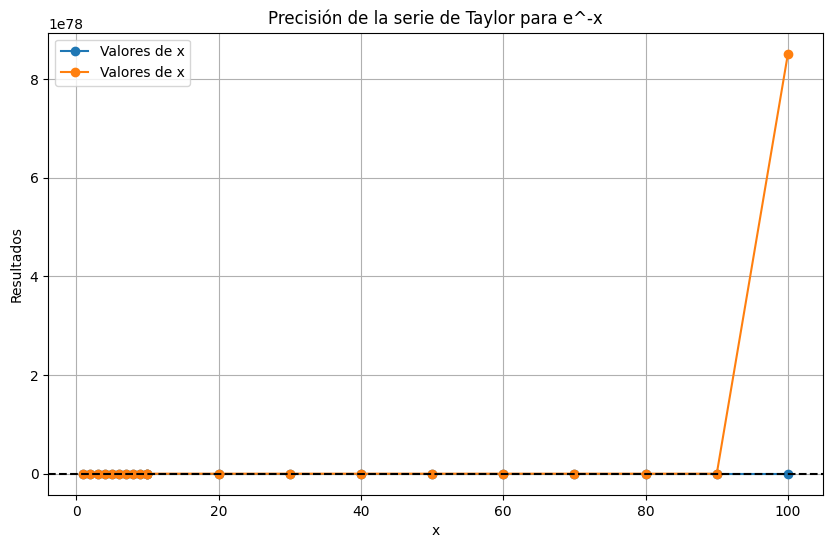

In [20]:
euler_taylor3(10, 50)

A partir de x = 90, la serie comienza a diverger

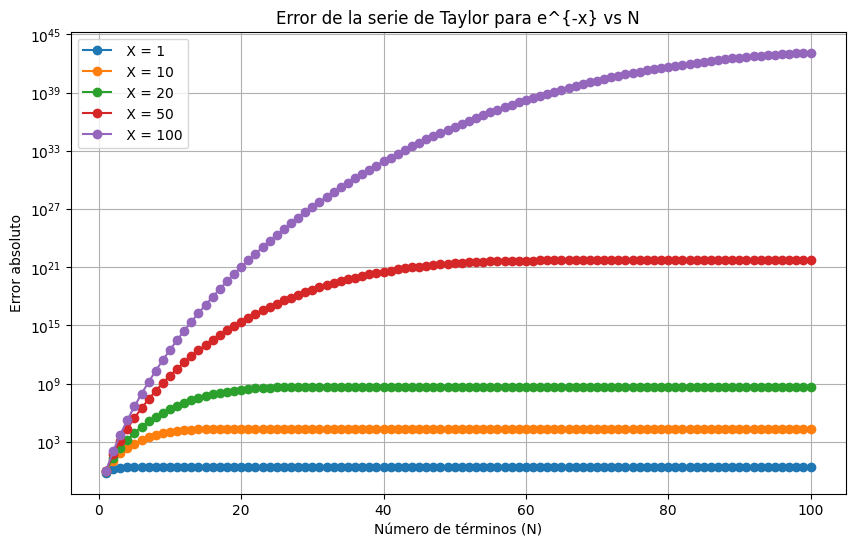

In [21]:
valores = [1, 10, 20, 50, 100]
n_max = 100

plt.figure(figsize=(10, 6))

for x in valores:

  errores = []

  for n in range(1, n_max + 1):
    resultado = euler_taylor_general(x, n)
    e_real = np.exp(-x)
    error = abs(e_real - resultado)
    errores.append(error)
  plt.plot(range(1, n_max + 1), errores, marker = 'o', label = f' X = {x}')

plt.yscale('log')
plt.title("Error de la serie de Taylor para e^{-x} vs N")
plt.xlabel("Número de términos (N)")
plt.ylabel("Error absoluto")
plt.grid()
plt.legend()
plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [39]:
def Sn1(n):

  Suma = 0
  for i in range(1, 2 * n+1):

    Suma += ((-1) ** i * i / (1 + i))

  return Suma

In [40]:
Sn1(10000)

0.30682782131491515

In [24]:
def Sn2(n):

   Suma1 = 0
   Suma2 = 0
   S = 0

   for i in range(1, n+1):

    Suma2 += ((2 * i) - 1) / (2 * i)

    Suma1 += (2 * i) / ((2 * i)+ 1)

    S =  -Suma2 + Suma1
   return S

In [25]:
Sn2(10000)

0.30682782129770203

In [26]:
def Sn3(n):

  Suma3 = 0

  for i in range(1, n+1):

    Suma3 += 1 / (2 * i * ((2 * i)+ 1))

  return Suma3

In [27]:
Sn3(10000)

0.3068278213149313

Las tres series comienzan a tener diferencia a partir del decimal 9 para valores grandes de n

In [43]:
n = 0

tole = 1e-4

anterior = Sn1(n)
siguiente = Sn1(n+1)

while abs(siguiente - anterior) > tole:

  n += 1

  anterior = siguiente
  siguiente = Sn1(n+1)

print(f'Las series convergen en {n} términos para una tolerancia de {tole}')

Las series convergen en 49 términos para una tolerancia de 0.0001


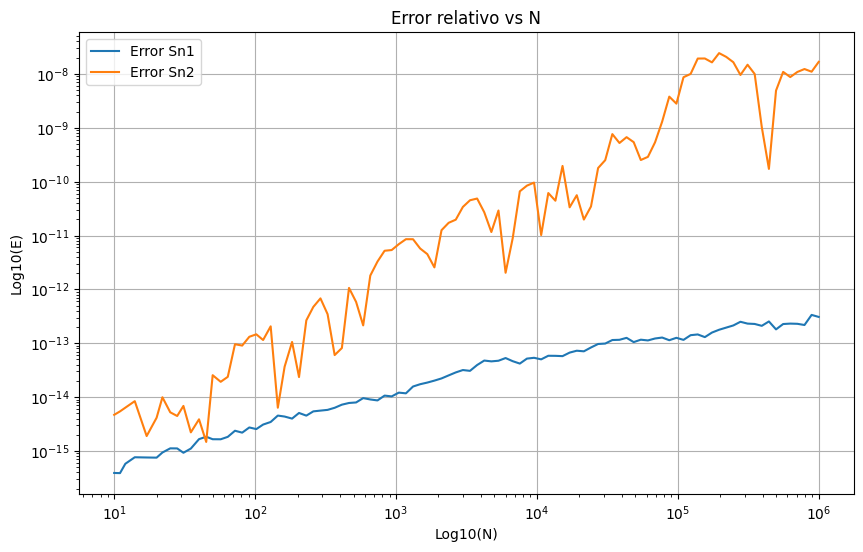

In [37]:
x = np.logspace(1, 6, num=100, dtype=int)

Sn_3 = []
E1 = []
E2 = []

for i in x:

  Sn_3.append(Sn3(i))

for j, n in enumerate(x):

  S1 = Sn1(n)
  S2 = Sn2(n)

  E1.append(abs((S1 - Sn_3[j]) / Sn_3[j]))
  E2.append(abs((S2 - Sn_3[j]) / Sn_3[j]))

plt.figure(figsize=(10, 6))
plt.loglog(x, E1, label ='Error Sn1')
plt.loglog(x, E2, label='Error Sn2')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.title('Error relativo vs N')
plt.legend()
plt.grid()
plt.show()

El error de Sn1 crece más rápido que el de Sn2, tomando a Sn3 como la solución exacta

Las 3 series convergen a números muy similares con n ≈ 10000

Tomando a Sn3 como la solución exacta de la serie alternante, de nuevo para valores de n ≈ 10000, las 2 series se diferencian de esta a partir del decimal 9.



In [45]:
import timeit

In [53]:
tiempo = timeit.timeit(lambda: Sn1(10000), number=1)

print(f"Tiempo de ejecución de Sn1: {tiempo} segundos")

Tiempo de ejecución de Sn1: 0.010119945000042208 segundos


In [54]:
tiempo = timeit.timeit(lambda: Sn2(10000), number=1)

print(f"Tiempo de ejecución de Sn2: {tiempo} segundos")

Tiempo de ejecución de Sn1: 0.005774436000137939 segundos


In [55]:
tiempo = timeit.timeit(lambda: Sn3(10000), number=1)

print(f"Tiempo de ejecución de Sn3: {tiempo} segundos")

Tiempo de ejecución de Sn3: 0.002671167999778845 segundos


Como se puede observar, la serie que menos tiempo consume es la 3